In [1069]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

import warnings

# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [1070]:
# Suppressing a warning 
warnings.filterwarnings("ignore") 

# It is a magic function that renders the figure in the notebook
%matplotlib inline 

# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (10, 6)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

# To display maximum columns
pd.set_option('display.max_columns', None)


In [1071]:
# train set
df_train = pd.read_csv("train.csv")

In [1072]:
df_train.head(50)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [1073]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [1074]:
df_train.Customer_ID.nunique()

12500

In [1075]:
df_train.Occupation.value_counts(dropna=False)

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [1076]:
for col in df_train.columns :
    print(col)
    print(df_train[col].value_counts(dropna=False))
    print("##########################")

ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: ID, Length: 100000, dtype: int64
##########################
Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64
##########################
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64
##########################
Name
NaN               9985
Stevex              44
Langep              44
Jessicad            39
Vaughanl            39
                  ... 
Robin Pomeroyz       4
Matt Scuffhamk       4
Julieno              4
Bavierq              4
Timothyl             3
Name: Name, Length: 10140, dtype: int64
#########################

In [1077]:
# # df_train.groupby("Customer_ID")["Occupation"].agg("mode")
# # df_train.groupby("Customer_ID")["Occupation"].agg(pd.Series.mode)
# df_train.groupby("Customer_ID")["Occupation"].value_counts().head(20)

In [1078]:
df_train["Occupation"].replace(["_______"], [None], inplace=True)

In [1079]:
# import sys
# sys.version

In [1080]:
df_train.Occupation.value_counts(dropna=False)

NaN              7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [1081]:
df_train.groupby("Customer_ID")["Occupation"].agg(pd.Series.mode).head(20)

Customer_ID
CUS_0x1000           Lawyer
CUS_0x1009         Mechanic
CUS_0x100b    Media_Manager
CUS_0x1011           Doctor
CUS_0x1013         Mechanic
CUS_0x1015       Journalist
CUS_0x1018       Accountant
CUS_0x1026          Manager
CUS_0x102d     Entrepreneur
CUS_0x102e        Scientist
CUS_0x1032           Lawyer
CUS_0x1037       Accountant
CUS_0x1038        Architect
CUS_0x103e        Scientist
CUS_0x1041          Teacher
CUS_0x1044     Entrepreneur
CUS_0x1048       Accountant
CUS_0x104a         Mechanic
CUS_0x104e          Teacher
CUS_0x104f        Architect
Name: Occupation, dtype: object

In [1082]:
df_train.groupby("Customer_ID")["Occupation"].agg(pd.Series.mode).tail(20)

Customer_ID
CUS_0xfb4           Writer
CUS_0xfb6       Accountant
CUS_0xfb8        Architect
CUS_0xfbd          Manager
CUS_0xfc9        Architect
CUS_0xfcb           Lawyer
CUS_0xfcc       Accountant
CUS_0xfd1        Architect
CUS_0xfdb          Teacher
CUS_0xfdd        Scientist
CUS_0xfdf         Mechanic
CUS_0xfe3    Media_Manager
CUS_0xfe4           Writer
CUS_0xfe5           Doctor
CUS_0xfea          Manager
CUS_0xff3        Scientist
CUS_0xff4     Entrepreneur
CUS_0xff6           Doctor
CUS_0xffc         Musician
CUS_0xffd        Scientist
Name: Occupation, dtype: object

In [1083]:
df_train["Occupation"]= df_train.groupby("Customer_ID")["Occupation"].fillna(method='bfill')

In [1084]:
df_train["Occupation"]= df_train.groupby("Customer_ID")["Occupation"].fillna(method='ffill')

In [1085]:
df_train.head(50)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [1086]:
(df_train.groupby("Customer_ID")["Occupation"].value_counts(dropna=False) != 8).sum()

0

In [1087]:
df_train["Occupation"].value_counts(dropna=False)

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

In [1088]:
df_train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [1089]:
# Name

df_train["Name"]= df_train.groupby("Customer_ID")["Name"].fillna(method='bfill').fillna(method='ffill')

In [1090]:
(df_train.groupby("Customer_ID")["Name"].value_counts(dropna=False) != 8).sum()

0

In [1091]:
df_train.head(60)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [1092]:
# Age
df_train.Age.value_counts(dropna=False).sample(20)

4630        1
328         1
6493        1
8389        1
4603        1
6618        1
2360        2
2932        1
5603        1
4204        1
2402        1
2756_       1
44_       136
5517        1
8216        1
4351        1
44       2688
2297        1
1482        1
1409        1
Name: Age, dtype: int64

In [1093]:
df_train["Age"] = df_train.Age.str.replace("_", "").astype(int)

In [1094]:
df_train.Age.value_counts(dropna=False).sample(20)

1265    1
7133    1
7060    1
4774    2
3413    1
7447    1
7618    1
4622    1
7799    1
1883    1
4732    1
3402    1
5066    1
4270    1
5001    1
5236    1
1785    1
3332    1
7336    1
6665    1
Name: Age, dtype: int64

In [1095]:
q1 = df_train.Age.quantile(0.25)
q3 = df_train.Age.quantile(0.75)
iqr = q3 -q1
lower = q1 -1.5*iqr
upper = q3 + 1.5*iqr
lower, upper

(-3.0, 69.0)

In [1096]:
(df_train.Age < 0).sum()

886

In [1097]:
df_train.groupby("Customer_ID")["Age"].value_counts().head(50)

Customer_ID  Age  
CUS_0x1000    17      5
              18      3
CUS_0x1009    26      6
              25      2
CUS_0x100b    18      4
              19      4
CUS_0x1011    44      7
              43      1
CUS_0x1013    44      6
              43      2
CUS_0x1015    27      7
              4510    1
CUS_0x1018    15      8
CUS_0x1026    51      4
              52      4
CUS_0x102d    30      5
              31      3
CUS_0x102e    26      6
              25      2
CUS_0x1032    40      7
              1853    1
CUS_0x1037    44      5
              45      3
CUS_0x1038    27      6
              28      2
CUS_0x103e    40      8
CUS_0x1041    15      6
              14      2
CUS_0x1044    44      8
CUS_0x1048    27      6
              26      1
              1217    1
CUS_0x104a    37      5
             -500     2
              36      1
CUS_0x104e    50      8
CUS_0x104f    20      5
              19      2
              2074    1
CUS_0x1051    41      4
              42     

In [1098]:
df_train["Age"] = df_train.Age.replace([df_train[(df_train.Age > upper) | (df_train.Age < 0)]["Age"]], [None])

In [1099]:
df_train.Age.value_counts(dropna=False)

38.0    2994
28.0    2968
31.0    2955
26.0    2945
32.0    2884
36.0    2868
35.0    2866
25.0    2861
27.0    2859
39.0    2846
34.0    2837
44.0    2824
19.0    2793
22.0    2785
41.0    2785
NaN     2781
20.0    2744
37.0    2742
29.0    2735
43.0    2734
30.0    2727
21.0    2716
24.0    2714
23.0    2654
45.0    2642
40.0    2609
42.0    2577
33.0    2543
18.0    2385
46.0    1621
15.0    1574
17.0    1502
16.0    1455
48.0    1385
49.0    1375
55.0    1366
52.0    1356
53.0    1354
54.0    1311
51.0    1291
50.0    1273
47.0    1227
14.0    1175
56.0     362
Name: Age, dtype: int64

In [1100]:
df_train["Age"] = df_train.groupby("Customer_ID")["Age"].fillna(method="bfill").fillna(method="ffill").astype(int)

In [1101]:
df_train.groupby("Customer_ID")["Age"].value_counts(dropna=False).head(20)

Customer_ID  Age
CUS_0x1000   17     5
             18     3
CUS_0x1009   26     6
             25     2
CUS_0x100b   18     4
             19     4
CUS_0x1011   44     7
             43     1
CUS_0x1013   44     6
             43     2
CUS_0x1015   27     8
CUS_0x1018   15     8
CUS_0x1026   51     4
             52     4
CUS_0x102d   30     5
             31     3
CUS_0x102e   26     6
             25     2
CUS_0x1032   40     8
CUS_0x1037   44     5
Name: Age, dtype: int64

In [1102]:
df_train[(df_train.Age > upper) | (df_train.Age < 0)]["Age"]

Series([], Name: Age, dtype: int32)

In [1103]:
df_train[(df_train.Age > upper) & (df_train.Age <100)].index

Int64Index([], dtype='int64')

In [1104]:
df_train[(df_train.Age > upper) & (df_train.Age <100)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [1105]:
# SSN

df_train.groupby("Customer_ID")["SSN"].value_counts(dropna=False)

Customer_ID  SSN        
CUS_0x1000   913-74-1218    8
CUS_0x1009   063-67-6938    7
             #F%$D@*&8      1
CUS_0x100b   238-62-0395    7
             #F%$D@*&8      1
                           ..
CUS_0xff3    #F%$D@*&8      1
CUS_0xff4    655-05-7666    8
CUS_0xff6    541-92-8371    8
CUS_0xffc    226-86-7294    8
CUS_0xffd    832-88-8320    8
Name: SSN, Length: 17115, dtype: int64

In [1106]:
df_train.SSN.value_counts(dropna=False)

#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: SSN, Length: 12501, dtype: int64

In [1107]:
df_train.SSN.replace(["#F%$D@*&8"], [None], inplace=True)

In [1108]:
df_train.SSN.value_counts(dropna=False)

NaN            5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: SSN, Length: 12501, dtype: int64

In [1109]:
df_train["SSN"] = df_train.groupby("Customer_ID")["SSN"].fillna(method="bfill").fillna(method="ffill")

In [1110]:
(df_train.SSN.value_counts(dropna=False) != 8).sum()

0

In [1111]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [1112]:
# Annual_Income
df_train["Annual_Income"] =df_train.Annual_Income.str.replace("_","").astype(float)

In [1113]:
(df_train.groupby("Customer_ID")["Annual_Income"].value_counts(dropna=False) != 8).sum()

1964

In [1114]:
df_train.groupby("Customer_ID")["Annual_Income"].value_counts()[df_train.groupby("Customer_ID")["Annual_Income"].value_counts()!=8]

Customer_ID  Annual_Income
CUS_0x1018   61194.81         7
             17117486.00      1
CUS_0x1057   86617.16         7
             1105753.00       1
CUS_0x107e   75095.91         7
                             ..
CUS_0xf20    20189519.00      1
CUS_0xf55    78443.48         7
             20350298.00      1
CUS_0xfa4    15035.19         7
             7711339.00       1
Name: Annual_Income, Length: 1964, dtype: int64

In [1115]:
df_train.groupby("Customer_ID")["Annual_Income"].agg(pd.Series.mode)

Customer_ID
CUS_0x1000     30625.940
CUS_0x1009     52312.680
CUS_0x100b    113781.390
CUS_0x1011     58918.470
CUS_0x1013     98620.980
                 ...    
CUS_0xff3      17032.785
CUS_0xff4      25546.260
CUS_0xff6     117639.920
CUS_0xffc      60877.170
CUS_0xffd      41398.440
Name: Annual_Income, Length: 12500, dtype: float64

In [1116]:
df_train["Annual_Income"] = df_train.groupby("Customer_ID")["Annual_Income"].transform(lambda x : x.mode()[0])

In [1117]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [1118]:
# Monthly_Inhand_Salary


In [1119]:
df_train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

# Öznur_Vildan
'Monthly_Inhand_Salary',
'Num_Bank_Accounts',
'Num_Credit_Card',
'Interest_Rate'

# Serdar-Allen
'Num_of_Loan',
'Type_of_Loan',
'Delay_from_due_date',
'Num_of_Delayed_Payment'

# Samet-İlknur
Changed_Credit_Limit',
'Num_Credit_Inquiries',
'Credit_Mix',
'Outstanding_Debt'

# 
'Credit_Utilization_Ratio',
'Credit_History_Age',
'Payment_of_Min_Amount',
'Total_EMI_per_month'

# 
'Amount_invested_monthly',
'Payment_Behaviour',
'Monthly_Balance',
'Credit_Score'

In [1120]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [1121]:
# Changed_Credit_Limit
df_train.head(50)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [1122]:
df_train.Changed_Credit_Limit.sample(20)

5313                   8.71
41378                   7.2
33498                  9.66
95991                  6.94
26327                   4.7
95098                  8.99
96588                 25.51
7939                  11.14
71377                  7.69
44137                  3.67
22898                 13.49
12207                     _
2739                   6.18
7037                   6.41
45361    3.7100000000000013
19779                  4.57
17402                  3.64
37206                  8.82
26691                 11.62
99671                 11.48
Name: Changed_Credit_Limit, dtype: object

In [1123]:
df_train.Changed_Credit_Limit.value_counts(dropna=False)

_                     2091
8.22                   133
11.5                   127
11.32                  126
7.35                   121
                      ... 
-1.84                    1
0.8899999999999999       1
28.06                    1
1.5599999999999996       1
21.17                    1
Name: Changed_Credit_Limit, Length: 4384, dtype: int64

In [1124]:
(df_train.Changed_Credit_Limit == "1.631.631.631.632.631.632.631.63").sum()

0

In [1125]:
df_train["Changed_Credit_Limit"] = df_train.Changed_Credit_Limit.replace(["_"], [None], regex=True).astype(float)

In [1126]:
df_train.Changed_Credit_Limit.value_counts(dropna=False)

 NaN      2091
 8.22      133
 11.50     127
 11.32     126
 7.35      121
          ... 
-1.84        1
 0.89        1
 28.06       1
 1.56        1
 21.17       1
Name: Changed_Credit_Limit, Length: 4384, dtype: int64

In [1127]:
df_train.groupby("Customer_ID")["Changed_Credit_Limit"].value_counts(dropna=False).head(20)

Customer_ID  Changed_Credit_Limit
CUS_0x1000   1.63                    6
             2.63                    2
CUS_0x1009   9.73                    8
CUS_0x100b   11.34                   6
             NaN                     1
             8.34                    1
CUS_0x1011   14.42                   6
             13.42                   2
CUS_0x1013   1.33                    7
             4.33                    1
CUS_0x1015   15.83                   6
             NaN                     1
             19.83                   1
CUS_0x1018   28.63                   8
CUS_0x1026   0.73                    8
CUS_0x102d   6.37                    7
             8.37                    1
CUS_0x102e   2.60                    7
             6.60                    1
CUS_0x1032   7.65                    6
Name: Changed_Credit_Limit, dtype: int64

In [1128]:
df_train.Changed_Credit_Limit.round(2)

0        11.27
1        11.27
2          NaN
3         6.27
4        11.27
         ...  
99995    11.50
99996    11.50
99997    11.50
99998    11.50
99999    11.50
Name: Changed_Credit_Limit, Length: 100000, dtype: float64

In [1129]:
df_train.groupby("Customer_ID")["Changed_Credit_Limit"].describe()

,count,mean,std,min,25%,50%,75%,max
Customer_ID,,,,,,,,
CUS_0x1000,8.0,1.880000,4.629100e-01,1.63,1.63,1.63,1.88,2.63
CUS_0x1009,8.0,9.730000,1.899005e-15,9.73,9.73,9.73,9.73,9.73
CUS_0x100b,7.0,10.911429,1.133893e+00,8.34,11.34,11.34,11.34,11.34
CUS_0x1011,8.0,14.170000,4.629100e-01,13.42,14.17,14.42,14.42,14.42
CUS_0x1013,8.0,1.705000,1.060660e+00,1.33,1.33,1.33,1.33,4.33
...,...,...,...,...,...,...,...,...
CUS_0xff3,8.0,8.485000,3.020761e+00,6.86,6.86,6.86,8.36,13.86
CUS_0xff4,8.0,8.205000,1.060660e+00,7.83,7.83,7.83,7.83,10.83
CUS_0xff6,8.0,11.900000,2.777460e+00,10.40,10.40,10.40,11.90,16.40


In [1130]:
df_train[df_train.Customer_ID == "CUS_0x100b"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1528,0x1ef6,CUS_0x100b,January,Shirboni,18,238-62-0395,Media_Manager,113781.39,9549.7825,1,4,1,0,NaN,14,7,11.34,1.0,Good,1030.2,37.998760,15 Years and 3 Months,No,0.0,397.24184577026637,Low_spent_Medium_value_payments,837.7364042297336,Poor
1529,0x1ef7,CUS_0x100b,February,Shirboni,18,238-62-0395,Media_Manager,113781.39,9549.7825,1,4,1,0,NaN,14,9,11.34,2271.0,_,1030.2,35.947655,NaN,No,0.0,661.6240479398714,Low_spent_Large_value_payments,563.3542020601286,Poor
1530,0x1ef8,CUS_0x100b,March,Shirboni,18,238-62-0395,Media_Manager,113781.39,NaN,1,4,1,0,NaN,19,7,11.34,1.0,Good,1030.2,43.829630,15 Years and 5 Months,No,0.0,NaN,High_spent_Large_value_payments,962.5677054168697,Poor
1531,0x1ef9,CUS_0x100b,April,Shirboni,18,238-62-0395,Media_Manager,113781.39,9549.7825,1,4,1,0,NaN,14,7,NaN,1.0,Good,1030.2,31.016086,15 Years and 6 Months,No,0.0,__10000__,High_spent_Large_value_payments,969.7201635239168,Standard
1532,0x1efa,CUS_0x100b,May,Shirboni,19,238-62-0395,Media_Manager,113781.39,9549.7825,1,4,1,0,NaN,9,7,11.34,1.0,Good,1030.2,32.035662,15 Years and 7 Months,No,0.0,758.0831954920012,Low_spent_Small_value_payments,486.8950545079987,Poor
1533,0x1efb,CUS_0x100b,June,Shirboni,19,238-62-0395,Media_Manager,113781.39,9549.7825,1,4,1,0,NaN,14,7,11.34,1.0,Good,1030.2,40.136062,15 Years and 8 Months,No,0.0,424.0032051421769,Low_spent_Medium_value_payments,810.9750448578231,Poor
1534,0x1efc,CUS_0x100b,July,Shirboni,19,238-62-0395,Media_Manager,113781.39,9549.7825,1,4,1,0_,NaN,10,7,11.34,4.0,Good,1030.2,29.174795,15 Years and 9 Months,NM,0.0,174.28759775147847,High_spent_Large_value_payments,1020.6906522485216,Standard
1535,0x1efd,CUS_0x100b,August,Shirboni,19,238-62-0395,Media_Manager,113781.39,9549.7825,1,4,1,0,NaN,14,8,8.34,4.0,Good,1030.2,28.592943,15 Years and 10 Months,No,0.0,617.0792665202719,High_spent_Small_value_payments,597.8989834797281,Standard


In [1131]:
# df_train.Changed_Credit_Limit sütununu median ile doldurmak en doğrusu.

df_train.groupby("Customer_ID")["Changed_Credit_Limit"].transform(lambda x : x.median()).head(20)

# Bu yöntemle bir müşteriye ait tüm değerler median değerine değişmiş olur. Biz bunu istemiyoruz.
# Sadece Null değerleri median ile doldurmak istiyoruz.

0     11.27
1     11.27
2     11.27
3     11.27
4     11.27
5     11.27
6     11.27
7     11.27
8      5.42
9      5.42
10     5.42
11     5.42
12     5.42
13     5.42
14     5.42
15     5.42
16     7.10
17     7.10
18     7.10
19     7.10
Name: Changed_Credit_Limit, dtype: float64

In [1132]:
df_train["Changed_Credit_Limit"] = df_train.groupby("Customer_ID")["Changed_Credit_Limit"].apply(lambda x: x.fillna(x.median()))

In [1133]:
# Num_Credit_Inquiries

df_train.groupby("Customer_ID")["Num_Credit_Inquiries"].value_counts(dropna=False)

Customer_ID  Num_Credit_Inquiries
CUS_0x1000   11.0                    7
             10.0                    1
CUS_0x1009   2.0                     4
             4.0                     4
CUS_0x100b   1.0                     5
                                    ..
CUS_0xffc    13.0                    7
             8.0                     1
CUS_0xffd    7.0                     6
             NaN                     1
             1801.0                  1
Name: Num_Credit_Inquiries, Length: 23058, dtype: int64

In [1134]:
(df_train.Num_Credit_Inquiries.isnull()).sum()

1965

In [1135]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [1136]:
df_train.head(50)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [1137]:
df_train.groupby("Customer_ID")["Num_Credit_Inquiries"].value_counts(dropna=False).head(50)

Customer_ID  Num_Credit_Inquiries
CUS_0x1000   11.0                    7
             10.0                    1
CUS_0x1009   2.0                     4
             4.0                     4
CUS_0x100b   1.0                     5
             4.0                     2
             2271.0                  1
CUS_0x1011   7.0                     7
             1965.0                  1
CUS_0x1013   3.0                     8
CUS_0x1015   9.0                     6
             4.0                     2
CUS_0x1018   8.0                     7
             NaN                     1
CUS_0x1026   3.0                     8
CUS_0x102d   3.0                     8
CUS_0x102e   4.0                     8
CUS_0x1032   9.0                     5
             5.0                     3
CUS_0x1037   3.0                     7
             2.0                     1
CUS_0x1038   10.0                    5
             8.0                     3
CUS_0x103e   4.0                     6
             0.0              

In [1138]:
df_train[df_train.Customer_ID == "CUS_0x1044"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
98640,0x257fa,CUS_0x1044,January,Maki Shirakip,44,261-18-4430,Entrepreneur,33441.59,2748.799167,2,4,1,0,NaN,5,4,14.58,1.0,Good,154.96,22.913388,31 Years and 4 Months,No,0.0,186.91203751884208,High_spent_Small_value_payments,347.967879,Standard
98641,0x257fb,CUS_0x1044,February,Maki Shirakip,44,261-18-4430,Entrepreneur,33441.59,2748.799167,2,4,1,0,NaN,1,4,9.58,2147.0,Good,154.96,35.472059,31 Years and 5 Months,No,0.0,224.40470714333543,Low_spent_Large_value_payments,320.47521,Standard
98642,0x257fc,CUS_0x1044,March,Maki Shirakip,44,261-18-4430,Entrepreneur,33441.59,2748.799167,2,4,1,0,NaN,1,4,9.58,1.0,Good,154.96,30.843789,31 Years and 6 Months,No,0.0,107.70673146734926,High_spent_Medium_value_payments,417.173185,Standard
98643,0x257fd,CUS_0x1044,April,Maki Shirakip,44,261-18-4430,Entrepreneur,33441.59,2748.799167,2,4,1,0,NaN,5,3,9.58,5.0,Good,154.96,26.466149,31 Years and 7 Months,No,0.0,169.28814697415444,Low_spent_Large_value_payments,375.59177,Standard
98644,0x257fe,CUS_0x1044,May,Maki Shirakip,44,261-18-4430,Entrepreneur,33441.59,2748.799167,2,4,1,0,NaN,1,6,9.58,5.0,Good,154.96,29.165226,31 Years and 8 Months,No,0.0,96.05035502361022,High_spent_Medium_value_payments,428.829562,Standard
98645,0x257ff,CUS_0x1044,June,Maki Shirakip,44,261-18-4430,Entrepreneur,33441.59,2748.799167,2,4,1,0,NaN,1,4,9.58,5.0,Good,154.96,25.647559,31 Years and 9 Months,NM,0.0,158.1958045813031,High_spent_Small_value_payments,376.684112,Standard
98646,0x25800,CUS_0x1044,July,Maki Shirakip,44,261-18-4430,Entrepreneur,33441.59,2748.799167,2,4,1,0,NaN,1,3,12.58,5.0,Good,154.96,38.117272,31 Years and 10 Months,No,0.0,69.98089251794511,High_spent_Large_value_payments,444.899024,Standard
98647,0x25801,CUS_0x1044,August,Maki Shirakip,44,261-18-4430,Entrepreneur,33441.59,2748.799167,2,4,1,0,NaN,1,4,9.58,5.0,_,154.96,35.984109,31 Years and 11 Months,No,0.0,229.53226071473443,Low_spent_Small_value_payments,335.347656,Standard


In [1139]:
df_train.groupby("Customer_ID")["Num_Credit_Inquiries"].mean()

Customer_ID
CUS_0x1000     10.875000
CUS_0x1009      3.000000
CUS_0x100b    285.500000
CUS_0x1011    251.750000
CUS_0x1013      3.000000
                 ...    
CUS_0xff3       4.250000
CUS_0xff4       5.000000
CUS_0xff6       2.000000
CUS_0xffc      12.375000
CUS_0xffd     263.285714
Name: Num_Credit_Inquiries, Length: 12500, dtype: float64

In [1140]:
df_train.groupby("Customer_ID")["Num_Credit_Inquiries"].median().head(50)

# null değerlerli median ile doldurmak daha doğru olur.
# Öncesinde çok yüksek olan değerler de median ile değiştirilmelidir.

Customer_ID
CUS_0x1000    11.0
CUS_0x1009     3.0
CUS_0x100b     1.0
CUS_0x1011     7.0
CUS_0x1013     3.0
CUS_0x1015     9.0
CUS_0x1018     8.0
CUS_0x1026     3.0
CUS_0x102d     3.0
CUS_0x102e     4.0
CUS_0x1032     9.0
CUS_0x1037     3.0
CUS_0x1038    10.0
CUS_0x103e     4.0
CUS_0x1041    10.0
CUS_0x1044     5.0
CUS_0x1048     7.0
CUS_0x104a     4.0
CUS_0x104e     6.0
CUS_0x104f     7.0
CUS_0x1051     5.0
CUS_0x1056     8.0
CUS_0x1057     4.0
CUS_0x105b     0.0
CUS_0x105c     0.0
CUS_0x1063    12.0
CUS_0x1069     5.0
CUS_0x106f     6.0
CUS_0x1075     1.0
CUS_0x107c     7.0
CUS_0x107e     8.0
CUS_0x1087     5.5
CUS_0x108a    15.0
CUS_0x1096     3.0
CUS_0x1098     8.0
CUS_0x109b     1.0
CUS_0x109d    11.0
CUS_0x109f     0.0
CUS_0x10a9     4.0
CUS_0x10aa     4.0
CUS_0x10ac     1.0
CUS_0x10b3     3.0
CUS_0x10b6     1.0
CUS_0x10bb     0.0
CUS_0x10c0     8.0
CUS_0x10c5     0.0
CUS_0x10d7    14.0
CUS_0x10dd     1.0
CUS_0x10df    14.0
CUS_0x10e2    11.0
Name: Num_Credit_Inquiries, dtype: flo

In [1141]:
q1 = df_train.Num_Credit_Inquiries.quantile(0.25)
q3 = df_train.Num_Credit_Inquiries.quantile(0.75)
iqr = q3 -q1
lower = q1 -1.5*iqr
upper = q3 + 1.5*iqr
lower, upper

(-6.0, 18.0)

In [1142]:
(df_train.Num_Credit_Inquiries < 0).sum()

0

In [1143]:
df_train[df_train.Num_Credit_Inquiries > 18].index

Int64Index([  173,   193,   198,   234,   312,   348,   503,   946,  1017,
             1100,
            ...
            99211, 99361, 99487, 99502, 99513, 99717, 99769, 99789, 99800,
            99872],
           dtype='int64', length=1650)

In [1144]:
df_train["Num_Credit_Inquiries"] = df_train.Num_Credit_Inquiries.replace(to_replace=[df_train[df_train.Num_Credit_Inquiries > upper]["Num_Credit_Inquiries"]], value=[None])

In [1145]:
(df_train.Num_Credit_Inquiries.isnull()).sum()

3615

In [1146]:
df_train.groupby("Customer_ID")["Num_Credit_Inquiries"].value_counts(dropna=False).head(50)

Customer_ID  Num_Credit_Inquiries
CUS_0x1000   11.0                    7
             10.0                    1
CUS_0x1009   2.0                     4
             4.0                     4
CUS_0x100b   1.0                     5
             4.0                     2
             NaN                     1
CUS_0x1011   7.0                     7
             NaN                     1
CUS_0x1013   3.0                     8
CUS_0x1015   9.0                     6
             4.0                     2
CUS_0x1018   8.0                     7
             NaN                     1
CUS_0x1026   3.0                     8
CUS_0x102d   3.0                     8
CUS_0x102e   4.0                     8
CUS_0x1032   9.0                     5
             5.0                     3
CUS_0x1037   3.0                     7
             2.0                     1
CUS_0x1038   10.0                    5
             8.0                     3
CUS_0x103e   4.0                     6
             0.0              

In [1147]:
# null değerlerin median ile doldurulması

df_train["Num_Credit_Inquiries"] = df_train.groupby("Customer_ID")["Num_Credit_Inquiries"].apply(lambda x : x.fillna(x.median()))

In [1148]:
df_train.groupby("Customer_ID")["Num_Credit_Inquiries"].value_counts(dropna=False).head(50)

Customer_ID  Num_Credit_Inquiries
CUS_0x1000   11.0                    7
             10.0                    1
CUS_0x1009   2.0                     4
             4.0                     4
CUS_0x100b   1.0                     6
             4.0                     2
CUS_0x1011   7.0                     8
CUS_0x1013   3.0                     8
CUS_0x1015   9.0                     6
             4.0                     2
CUS_0x1018   8.0                     8
CUS_0x1026   3.0                     8
CUS_0x102d   3.0                     8
CUS_0x102e   4.0                     8
CUS_0x1032   9.0                     5
             5.0                     3
CUS_0x1037   3.0                     7
             2.0                     1
CUS_0x1038   10.0                    5
             8.0                     3
CUS_0x103e   4.0                     6
             0.0                     2
CUS_0x1041   10.0                    7
             7.0                     1
CUS_0x1044   5.0              

In [1149]:
# Birden fazla Num_Credit_Inquiries olan var.
# Bunları tek bir sayıya yine median kullanılarak düşürmek gerekir mi? yoksa böyle mi bırakalım?

In [1150]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [1151]:
# Credit_Mix

df_train.groupby("Customer_ID")["Credit_Mix"].value_counts(dropna=False)

Customer_ID  Credit_Mix
CUS_0x1000   Bad           8
CUS_0x1009   Standard      5
             _             3
CUS_0x100b   Good          7
             _             1
                          ..
CUS_0xff6    _             1
CUS_0xffc    Bad           6
             _             2
CUS_0xffd    Standard      6
             _             2
Name: Credit_Mix, Length: 22977, dtype: int64

In [1152]:
df_train.Credit_Mix.value_counts(dropna=False)

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [1153]:
df_train.Credit_Mix.replace(["_"], [None], inplace=True)

In [1154]:
df_train.Credit_Mix.value_counts(dropna=False)

Standard    36479
Good        24337
NaN         20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [1155]:
# Bu metod ile sütundaki bütün değerler mode değerleri ile değiştiriliyor. Bizim amacımız null değerleri doldurmak.
# Bu nedenle aşağıdaki meatodu kullanmak daha doğru olacaktır.

df_train["Credit_Mix"] = df_train.groupby("Customer_ID")["Credit_Mix"].transform(lambda x : x.mode()[0])

In [1156]:
# Customer_ID 'ye göre gruplandırılmış verilerdeki null değerlerin apply ve fillna metodları kullanılarak doldurulması

df_train["Credit_Mix"] = df_train.groupby("Customer_ID")["Credit_Mix"].apply(lambda x : x.fillna(x.mode()[0]))

In [1157]:
df_train.Credit_Mix.value_counts(dropna=False)

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

In [1158]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [1159]:
# Outstanding_Debt

df_train.Outstanding_Debt.value_counts(dropna=False)

1360.45     24
460.46      23
1151.7      23
1109.03     23
467.7       16
            ..
245.46_      1
645.77_      1
174.79_      1
1181.13_     1
1013.53_     1
Name: Outstanding_Debt, Length: 13178, dtype: int64

In [1160]:
df_train.groupby("Customer_ID")["Outstanding_Debt"].value_counts(dropna=False)

Customer_ID  Outstanding_Debt
CUS_0x1000   1562.91             8
CUS_0x1009   202.68              7
             202.68_             1
CUS_0x100b   1030.2              8
CUS_0x1011   473.14              8
                                ..
CUS_0xff3    1229.08             8
CUS_0xff4    758.44              8
CUS_0xff6    338.3               8
CUS_0xffc    1300.13             8
CUS_0xffd    1701.88             8
Name: Outstanding_Debt, Length: 13481, dtype: int64

In [1161]:
df_train["Outstanding_Debt"] = df_train.Outstanding_Debt.str.replace("_", "").astype(float)

In [1162]:
df_train.Outstanding_Debt.value_counts(dropna=False)

1109.03    24
1151.70    24
1360.45    24
460.46     24
1058.13    16
           ..
4230.04     8
641.99      8
98.61       8
2614.48     8
502.38      8
Name: Outstanding_Debt, Length: 12203, dtype: int64

In [1163]:
df_train.groupby("Customer_ID")["Outstanding_Debt"].value_counts(dropna=False)

Customer_ID  Outstanding_Debt
CUS_0x1000   1562.91             8
CUS_0x1009   202.68              8
CUS_0x100b   1030.20             8
CUS_0x1011   473.14              8
CUS_0x1013   1233.51             8
                                ..
CUS_0xff3    1229.08             8
CUS_0xff4    758.44              8
CUS_0xff6    338.30              8
CUS_0xffc    1300.13             8
CUS_0xffd    1701.88             8
Name: Outstanding_Debt, Length: 12500, dtype: int64

In [1164]:
(df_train.groupby("Customer_ID")["Outstanding_Debt"].value_counts(dropna=False) != 8).sum()

0

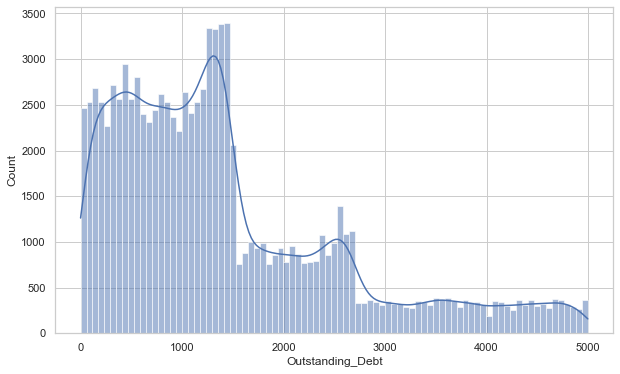

In [1165]:
sns.histplot(data=df_train, x="Outstanding_Debt", kde=True);

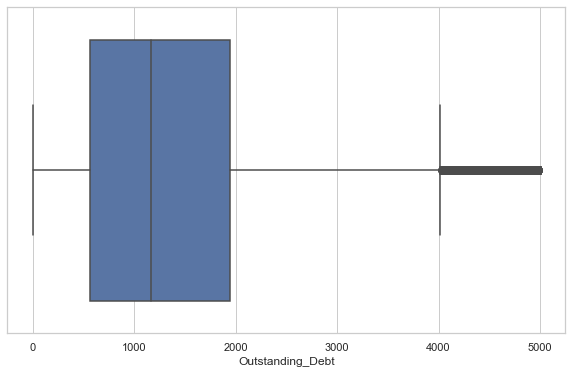

In [1166]:
sns.boxplot(df_train.Outstanding_Debt);

In [1167]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [1168]:
# Credit_Utilization_Ratio

df_train.Credit_Utilization_Ratio.value_counts(dropna=False)

26.822620    1
28.327949    1
30.016576    1
25.478841    1
33.933755    1
            ..
30.687138    1
38.730069    1
30.017515    1
27.279794    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 100000, dtype: int64

In [1169]:
df_train.groupby("Customer_ID")["Credit_Utilization_Ratio"].value_counts(dropna=False)

Customer_ID  Credit_Utilization_Ratio
CUS_0x1000   26.612093                   1
             29.439759                   1
             30.077191                   1
             32.330508                   1
             32.843081                   1
                                        ..
CUS_0xffd    29.506673                   1
             33.916363                   1
             36.384516                   1
             36.970072                   1
             39.916655                   1
Name: Credit_Utilization_Ratio, Length: 100000, dtype: int64

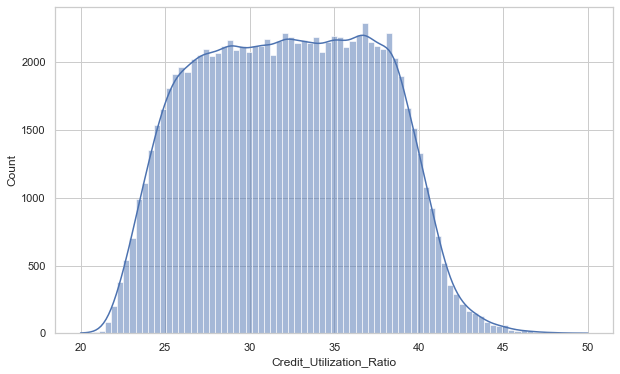

In [1170]:
sns.histplot(data=df_train, x="Credit_Utilization_Ratio", kde=True);

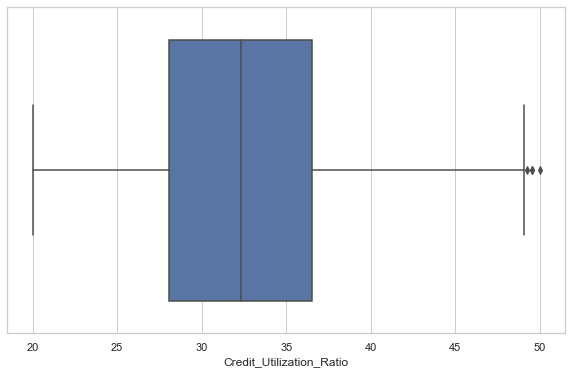

In [1171]:
sns.boxplot(df_train.Credit_Utilization_Ratio);

In [1172]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [1173]:
# Credit_History_Age

df_train.Credit_History_Age.value_counts(dropna=False)

NaN                       9030
15 Years and 11 Months     446
19 Years and 4 Months      445
19 Years and 5 Months      444
17 Years and 11 Months     443
                          ... 
0 Years and 3 Months        20
0 Years and 2 Months        15
33 Years and 7 Months       14
33 Years and 8 Months       12
0 Years and 1 Months         2
Name: Credit_History_Age, Length: 405, dtype: int64

In [1174]:
df_train.groupby("Customer_ID")["Credit_History_Age"].value_counts(dropna=False).head(50)

Customer_ID  Credit_History_Age    
CUS_0x1000   10 Years and 2 Months     1
             10 Years and 3 Months     1
             10 Years and 4 Months     1
             10 Years and 5 Months     1
             10 Years and 6 Months     1
             10 Years and 7 Months     1
             10 Years and 8 Months     1
             10 Years and 9 Months     1
CUS_0x1009   NaN                       1
             30 Years and 10 Months    1
             30 Years and 11 Months    1
             30 Years and 5 Months     1
             30 Years and 6 Months     1
             30 Years and 7 Months     1
             30 Years and 9 Months     1
             31 Years and 0 Months     1
CUS_0x100b   NaN                       1
             15 Years and 10 Months    1
             15 Years and 3 Months     1
             15 Years and 5 Months     1
             15 Years and 6 Months     1
             15 Years and 7 Months     1
             15 Years and 8 Months     1
             15 Years

In [1175]:
df_train["Credit_History_Age"].head(50)

0      22 Years and 1 Months
1                        NaN
2      22 Years and 3 Months
3      22 Years and 4 Months
4      22 Years and 5 Months
5      22 Years and 6 Months
6      22 Years and 7 Months
7                        NaN
8      26 Years and 7 Months
9      26 Years and 8 Months
10     26 Years and 9 Months
11    26 Years and 10 Months
12    26 Years and 11 Months
13     27 Years and 0 Months
14     27 Years and 1 Months
15     27 Years and 2 Months
16     17 Years and 9 Months
17    17 Years and 10 Months
18    17 Years and 11 Months
19                       NaN
20     18 Years and 1 Months
21     18 Years and 2 Months
22     18 Years and 3 Months
23     18 Years and 4 Months
24     17 Years and 3 Months
25     17 Years and 4 Months
26     17 Years and 5 Months
27     17 Years and 6 Months
28     17 Years and 7 Months
29     17 Years and 8 Months
30     17 Years and 9 Months
31    17 Years and 10 Months
32     30 Years and 8 Months
33     30 Years and 9 Months
34    30 Years

In [1176]:
df_Credit_History_Age = df_train.Credit_History_Age.str.split()

In [1177]:
int(df_Credit_History_Age[0][0])*12 + int(df_Credit_History_Age[0][3])

265

In [1178]:
df_Credit_History_Age

0         [22, Years, and, 1, Months]
1                                 NaN
2         [22, Years, and, 3, Months]
3         [22, Years, and, 4, Months]
4         [22, Years, and, 5, Months]
                     ...             
99995     [31, Years, and, 6, Months]
99996     [31, Years, and, 7, Months]
99997     [31, Years, and, 8, Months]
99998     [31, Years, and, 9, Months]
99999    [31, Years, and, 10, Months]
Name: Credit_History_Age, Length: 100000, dtype: object

In [1179]:
df_train.Credit_History_Age.str.split()

0         [22, Years, and, 1, Months]
1                                 NaN
2         [22, Years, and, 3, Months]
3         [22, Years, and, 4, Months]
4         [22, Years, and, 5, Months]
                     ...             
99995     [31, Years, and, 6, Months]
99996     [31, Years, and, 7, Months]
99997     [31, Years, and, 8, Months]
99998     [31, Years, and, 9, Months]
99999    [31, Years, and, 10, Months]
Name: Credit_History_Age, Length: 100000, dtype: object

In [1180]:
def Cred_Hist_Age (cha) :
    if type(cha) == float :   # veya pd.isna(cha) da denenebilir
        return cha
    else :
        return int(cha.split()[0])*12 + int(cha.split()[3])


df_train["Credit_History_Age"] = df_train.Credit_History_Age.apply(Cred_Hist_Age)

In [1181]:
df_train.Credit_History_Age.value_counts(dropna=False)

NaN      9030
191.0     446
232.0     445
233.0     444
215.0     443
         ... 
3.0        20
2.0        15
403.0      14
404.0      12
1.0         2
Name: Credit_History_Age, Length: 405, dtype: int64

In [1182]:
df_train.groupby("Customer_ID")["Credit_History_Age"].value_counts(dropna=False).head(50)

Customer_ID  Credit_History_Age
CUS_0x1000   122.0                 1
             123.0                 1
             124.0                 1
             125.0                 1
             126.0                 1
             127.0                 1
             128.0                 1
             129.0                 1
CUS_0x1009   NaN                   1
             365.0                 1
             366.0                 1
             367.0                 1
             369.0                 1
             370.0                 1
             371.0                 1
             372.0                 1
CUS_0x100b   NaN                   1
             183.0                 1
             185.0                 1
             186.0                 1
             187.0                 1
             188.0                 1
             189.0                 1
             190.0                 1
CUS_0x1011   183.0                 1
             184.0                 1
      

In [1183]:
df_train["Credit_History_Age"].head(50)

0     265.0
1       NaN
2     267.0
3     268.0
4     269.0
5     270.0
6     271.0
7       NaN
8     319.0
9     320.0
10    321.0
11    322.0
12    323.0
13    324.0
14    325.0
15    326.0
16    213.0
17    214.0
18    215.0
19      NaN
20    217.0
21    218.0
22    219.0
23    220.0
24    207.0
25    208.0
26    209.0
27    210.0
28    211.0
29    212.0
30    213.0
31    214.0
32    368.0
33    369.0
34    370.0
35    371.0
36    372.0
37    373.0
38    374.0
39    375.0
40      NaN
41    384.0
42      NaN
43    386.0
44    387.0
45      NaN
46    389.0
47    390.0
48    367.0
49    368.0
Name: Credit_History_Age, dtype: float64

In [1184]:
def fill_first_null(x) :
#     print(x.index[0], x.values[0], min(x), pd.isna(x.values[0]), pd.isna(min(x)))

    if pd.isna(x.values[0]) :
#         print("XXXXXXXXXXX")
        x.values[0] = x.values[1] - 1
        return x.values[0]
    else :
        return x.values[0]
#     for i in range(1, len(x)) :
#         if pd.isna(x.values[i]) :
#             x.values[i] = x.values[i-1] + 1
#             return x.values[i]
#         else :
#             return x.values[i]
                

df_train["History_Age"] = df_train.groupby("Customer_ID")["Credit_History_Age"].transform(lambda x : fill_first_null(x))

# veya

df_train["History_Age"] = df_train.groupby("Customer_ID")["Credit_History_Age"].transform(fill_first_null)


In [1185]:
df_train["History_Age"]

0        265.0
1        265.0
2        265.0
3        265.0
4        265.0
         ...  
99995    375.0
99996    375.0
99997    375.0
99998    375.0
99999    375.0
Name: History_Age, Length: 100000, dtype: float64

In [1186]:
df_train["History_Age"] = df_train["History_Age"].fillna(0)

In [1187]:
df_train["History_Age"].isnull().sum()

0

In [1188]:
df_train["Final_Age"] = df_train.groupby("Customer_ID")["History_Age"].transform(lambda x : np.arange(int(x.min()), int(x.min())+8))

In [1189]:
df_train["Final_Age"].isnull().sum()

0

In [1190]:
df_train[["Final_Age", "Credit_History_Age"]].tail(50)

,Final_Age,Credit_History_Age
99950,247,247.0
99951,248,248.0
99952,203,203.0
99953,204,204.0
99954,205,205.0
99955,206,206.0
99956,207,207.0
99957,208,208.0
99958,209,209.0
99959,210,210.0


In [1191]:
np.arange(265,265+8)

array([265, 266, 267, 268, 269, 270, 271, 272])

In [1192]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [1193]:
# Payment_of_Min_Amount

df_train.Payment_of_Min_Amount.value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [1194]:
df_train.groupby("Customer_ID")["Payment_of_Min_Amount"].value_counts(dropna=False).head(50)

Customer_ID  Payment_of_Min_Amount
CUS_0x1000   Yes                      8
CUS_0x1009   Yes                      7
             NM                       1
CUS_0x100b   No                       7
             NM                       1
CUS_0x1011   Yes                      7
             NM                       1
CUS_0x1013   No                       7
             NM                       1
CUS_0x1015   Yes                      6
             NM                       2
CUS_0x1018   Yes                      7
             NM                       1
CUS_0x1026   No                       8
CUS_0x102d   No                       7
             NM                       1
CUS_0x102e   Yes                      7
             NM                       1
CUS_0x1032   Yes                      7
             NM                       1
CUS_0x1037   No                       6
             NM                       2
CUS_0x1038   Yes                      8
CUS_0x103e   No                       7
     

In [1195]:
df_train.head(50)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,History_Age,Final_Age
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,265.0,265
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,265.0,266
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,265.0,267
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,265.0,268
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,265.0,269
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,270.0,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good,265.0,270
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,271.0,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good,265.0,271
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard,265.0,272
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,319.0,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard,319.0,319
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,320.0,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good,319.0,320


In [1198]:
df_train["Payment_of_Min_Amount"] = df_train.groupby("Customer_ID")["Payment_of_Min_Amount"].transform(lambda x: x.mode()[0])

In [1199]:
df_train["Payment_of_Min_Amount"].value_counts(dropna=False)

Yes    58880
No     40248
NM       872
Name: Payment_of_Min_Amount, dtype: int64

In [1201]:
df_train[df_train["Payment_of_Min_Amount"] == "NM"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,History_Age,Final_Age
392,0x184e,CUS_0x22a3,January,Nate Raymondj,38,477-90-5881,Doctor,95956.50,8279.375000,8,4,11,-100,"Personal Loan, and Student Loan",18,10,11.94,2.0,Standard,1079.73,33.776928,379.0,NM,95.521629,NaN,High_spent_Large_value_payments,884.9056902902464,Standard,379.0,379
393,0x184f,CUS_0x22a3,February,Nate Raymondj,38,477-90-5881,Doctor,95956.50,8279.375000,8,4,11,2,"Personal Loan, and Student Loan",23,10,11.94,2.0,Standard,1079.73,35.740067,380.0,NM,95.521629,265.3115233534598,High_spent_Medium_value_payments,717.1043478643835,Standard,379.0,380
394,0x1850,CUS_0x22a3,March,Nate Raymondj,38,477-90-5881,Doctor,95956.50,8279.375000,8,4,11,2,"Personal Loan, and Student Loan",23,10,11.94,2.0,Standard,1079.73,42.137603,381.0,NM,95.521629,377.3584081424742,Low_spent_Medium_value_payments,635.0574630753691,Standard,379.0,381
395,0x1851,CUS_0x22a3,April,Nate Raymondj,38,477-90-5881,Doctor,95956.50,8279.375000,8,4,11,2,"Personal Loan, and Student Loan",28,NaN,13.94,2.0,Standard,1079.73,28.068382,382.0,NM,95.521629,623.4087218945351,Low_spent_Medium_value_payments,389.00714932330817,Good,379.0,382
396,0x1852,CUS_0x22a3,May,Nate Raymondj,38,477-90-5881,Doctor,95956.50,8279.375000,8,4,11,2,"Personal Loan, and Student Loan",22,13,11.94,2.0,Standard,1079.73,37.207262,383.0,NM,95.521629,517.8021721033211,High_spent_Small_value_payments,474.61369911452215,Standard,379.0,383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98251,0x255b1,CUS_0x867e,April,Gregl,39,500-65-8725,Teacher,32471.74,NaN,7,10,19,9,"Not Specified, Debt Consolidation Loan, Debt C...",60,22,2.77,8.0,Bad,1539.53,28.500572,200.0,NM,141.922723,272.5694865952707,Low_spent_Medium_value_payments,149.30562398203847,Poor,197.0,200
98252,0x255b2,CUS_0x867e,May,Gregl,39,500-65-8725,Teacher,32471.74,2837.978333,7,10,19,9,"Not Specified, Debt Consolidation Loan, Debt C...",60,NaN,2.77,8.0,Bad,1539.53,29.296071,201.0,NM,141.922723,344.4318179919941,Low_spent_Small_value_payments,87.44329258531508,Poor,197.0,201
98253,0x255b3,CUS_0x867e,June,Gregl,39,500-65-8725,Teacher,32471.74,2837.978333,7,10,19,9,"Not Specified, Debt Consolidation Loan, Debt C...",60,22,2.77,8.0,Bad,1539.53,34.736699,NaN,NM,141.922723,161.47967710361945,High_spent_Small_value_payments,240.39543347368968,Poor,197.0,202
98254,0x255b4,CUS_0x867e,July,Gregl,40,500-65-8725,Teacher,32471.74,2837.978333,7,10,19,9,"Not Specified, Debt Consolidation Loan, Debt C...",60,NaN,2.77,11.0,Bad,1539.53,33.530443,203.0,NM,141.922723,235.66515548463585,Low_spent_Medium_value_payments,186.2099550926733,Poor,197.0,203


In [1202]:
df_train[df_train["Payment_of_Min_Amount"] == "NM"].groupby("Customer_ID")["Payment_of_Min_Amount"].value_counts()

Customer_ID  Payment_of_Min_Amount
CUS_0x10b3   NM                       8
CUS_0x1136   NM                       8
CUS_0x15df   NM                       8
CUS_0x1604   NM                       8
CUS_0x1733   NM                       8
                                     ..
CUS_0xc299   NM                       8
CUS_0xc515   NM                       8
CUS_0xc6c3   NM                       8
CUS_0xd6a    NM                       8
CUS_0xebd    NM                       8
Name: Payment_of_Min_Amount, Length: 109, dtype: int64

In [ ]:
# Yukarıdaki sonuca göre 109 kişinin Payment_of_Min_Amount değerleri belirtilmemiş. Bu satırları silelim mi?
# Payment_of_Min_Amount bilgisi credit score değerini etkileyen bir parametre mi?
# Payment_of_Min_Amount ile credit score değerleri arasında korelasyon var mı?
# bunlara bakılacak.


In [1203]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [1205]:
# Total_EMI_per_month

df_train.Total_EMI_per_month.value_counts(dropna=False)

0.000000        10613
49.574949           8
73.533361           8
22.960835           8
38.661127           8
                ...  
36408.000000        1
23760.000000        1
24612.000000        1
24325.000000        1
58638.000000        1
Name: Total_EMI_per_month, Length: 14950, dtype: int64

In [1216]:
df_train.groupby("Customer_ID")["Total_EMI_per_month"].value_counts(dropna=False)

Customer_ID  Total_EMI_per_month
CUS_0x1000   42.941090              8
CUS_0x1009   108.366467             8
CUS_0x100b   0.000000               8
CUS_0x1011   123.434939             8
CUS_0x1013   228.018084             7
                                   ..
CUS_0xff3    33.299764              8
CUS_0xff4    101.328637             8
CUS_0xff6    126.638453             8
CUS_0xffc    272.809169             8
CUS_0xffd    182.976649             8
Name: Total_EMI_per_month, Length: 16436, dtype: int64

In [1207]:
df_train.head(50)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,History_Age,Final_Age
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,265.0,265
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,265.0,266
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,265.0,267
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,265.0,268
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,265.0,269
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,270.0,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good,265.0,270
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,271.0,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good,265.0,271
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard,265.0,272
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,319.0,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard,319.0,319
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,320.0,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good,319.0,320


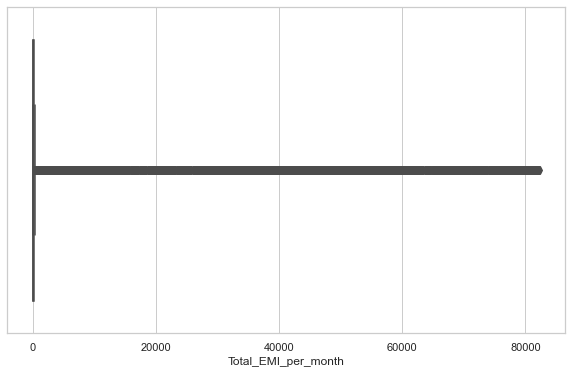

In [1217]:
sns.boxplot(df_train["Total_EMI_per_month"]);

In [1218]:
q1 = df_train.Total_EMI_per_month.quantile(0.25)
q3 = df_train.Total_EMI_per_month.quantile(0.75)
iqr = q3 -q1
lower = q1 -1.5*iqr
upper = q3 + 1.5*iqr
lower, upper

(-166.06972242783047, 357.60063203221614)

In [1219]:
(df_train["Total_EMI_per_month"] < 0).sum()

0

In [1220]:
df_train["Total_EMI_per_month"].tail(50)

99950       26.778419
99951       26.778419
99952      114.271146
99953      114.271146
99954      114.271146
99955      362.072453
99956      362.072453
99957      362.072453
99958      362.072453
99959      362.072453
99960    50894.000000
99961       34.975457
99962       34.975457
99963       34.975457
99964       34.975457
99965       34.975457
99966       34.975457
99967       34.975457
99968       41.113561
99969       41.113561
99970    75011.000000
99971       41.113561
99972       41.113561
99973       41.113561
99974       41.113561
99975       41.113561
99976       84.205949
99977       84.205949
99978       84.205949
99979       84.205949
99980       84.205949
99981       84.205949
99982       84.205949
99983       84.205949
99984       60.964772
99985    12112.000000
99986       60.964772
99987       60.964772
99988       60.964772
99989       60.964772
99990       60.964772
99991       60.964772
99992       35.104023
99993    58638.000000
99994       35.104023
99995     

In [1223]:
(df_train["Total_EMI_per_month"] > 1000).sum()

3411

In [1224]:
df_train[df_train["Total_EMI_per_month"] > 1000]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,History_Age,Final_Age
40,0x163e,CUS_0x95ee,January,Np,31,612-70-8987,Lawyer,73928.46,NaN,4,1288,8,0,NaN,12,10,10.14,2.0,Good,548.20,39.962685,NaN,No,15015.0,98.67440994166124,High_spent_Large_value_payments,740.1960900583389,Good,383.0,383
45,0x1643,CUS_0x95ee,June,Np,31,612-70-8987,Lawyer,73928.46,5988.705000,4,5,8,0,NaN,7,7,10.14,2.0,Good,548.20,35.275437,NaN,No,15515.0,235.79032503182026,Low_spent_Large_value_payments,633.0801749681799,Good,383.0,388
51,0x164d,CUS_0x284a,April,Nadiaq,34,411-51-0676,Lawyer,131313.40,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2,8.34,4.0,Good,352.16,42.645785,370.0,No,23834.0,337.43495631738324,High_spent_Medium_value_payments,899.1987716145285,Good,367.0,370
52,0x164e,CUS_0x284a,May,Nadiaq,34,411-51-0676,Lawyer,131313.40,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,4,9.34,4.0,Good,352.16,40.902517,371.0,No,32662.0,263.3789089320552,High_spent_Large_value_payments,963.2548189998564,Good,367.0,371
76,0x1672,CUS_0xba08,May,Jamesj,44,366-68-1681,Journalist,31370.80,2825.233333,1,6,12,2,"Not Specified, and Payday Loan",1,0,5.76,5.0,Good,421.43,25.189232,321.0,No,16415.0,184.70057162057685,Low_spent_Small_value_payments,341.20663263941435,Good,317.0,321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99921,0x25f7b,CUS_0x2654,February,enj,38,647-67-8889,Media_Manager,139664.96,11777.746667,3,6,12,4,"Credit-Builder Loan, Credit-Builder Loan, Stud...",14,12,12.39,8.0,Standard,365.66,40.171095,356.0,Yes,20563.0,421.3188655158438,High_spent_Medium_value_payments,582.724785,Standard,355.0,356
99960,0x25fb6,CUS_0x372c,January,Lucia Mutikanik,18,340-85-7301,Lawyer,42903.79,3468.315833,0,4,6,1,Not Specified,14,0,4.10,1.0,Good,1079.48,27.289440,337.0,No,50894.0,78.51494451125625,High_spent_Small_value_payments,493.341182,Good,337.0,337
99970,0x25fc4,CUS_0xf16,March,Maria Sheahanb,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,1,5,4,"Payday Loan, Student Loan, Mortgage Loan, and ...",1,0,5.69,8.0,Good,897.16,30.472041,255.0,No,75011.0,75.50497238307716,Low_spent_Medium_value_payments,316.184384,Good,253.0,255
99985,0x25fdb,CUS_0x8600,February,Sarah McBridec,28,031-35-0942,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,25,23.31,9.0,Bad,3571.70,39.772607,69.0,Yes,12112.0,148.2752327451465,Low_spent_Small_value_payments,273.750662,Poor,68.0,69


In [1226]:
df_train[df_train["Total_EMI_per_month"] > upper].head(50)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,History_Age,Final_Age
40,0x163e,CUS_0x95ee,January,Np,31,612-70-8987,Lawyer,73928.460,NaN,4,1288,8,0,NaN,12,10,10.14,2.0,Good,548.20,39.962685,NaN,No,15015.000000,98.67440994166124,High_spent_Large_value_payments,740.1960900583389,Good,383.0,383
45,0x1643,CUS_0x95ee,June,Np,31,612-70-8987,Lawyer,73928.460,5988.705000,4,5,8,0,NaN,7,7,10.14,2.0,Good,548.20,35.275437,NaN,No,15515.000000,235.79032503182026,Low_spent_Large_value_payments,633.0801749681799,Good,383.0,388
50,0x164c,CUS_0x284a,March,Nadiaq,34,411-51-0676,Lawyer,131313.400,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,3,9.34,4.0,Good,352.16,31.803134,369.0,No,911.220179,188.06432109973838,High_spent_Large_value_payments,1038.5694068321734,Good,367.0,369
51,0x164d,CUS_0x284a,April,Nadiaq,34,411-51-0676,Lawyer,131313.400,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2,8.34,4.0,Good,352.16,42.645785,370.0,No,23834.000000,337.43495631738324,High_spent_Medium_value_payments,899.1987716145285,Good,367.0,370
52,0x164e,CUS_0x284a,May,Nadiaq,34,411-51-0676,Lawyer,131313.400,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,4,9.34,4.0,Good,352.16,40.902517,371.0,No,32662.000000,263.3789089320552,High_spent_Large_value_payments,963.2548189998564,Good,367.0,371
53,0x164f,CUS_0x284a,June,Nadiaq,34,411-51-0676,Lawyer,131313.400,NaN,0,1,8,-100,"Credit-Builder Loan, and Mortgage Loan",0,3_,11.34,4.0,Good,352.16,41.980170,372.0,No,911.220179,86.56638801207531,High_spent_Large_value_payments,1140.0673399198365,Standard,367.0,372
54,0x1650,CUS_0x284a,July,Nadiaq,34,411-51-0676,Lawyer,131313.400,NaN,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2_,9.34,4.0,Good,352.16,26.947565,373.0,No,911.220179,930.3918977796665,!@9#%8,326.24183015224526,Good,367.0,373
55,0x1651,CUS_0x284a,August,Nadiaq,34,411-51-0676,Lawyer,131313.400,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2,9.34,4.0,Good,352.16,29.187913,374.0,No,911.220179,870.52238171816,Low_spent_Medium_value_payments,396.1113462137519,Good,367.0,374
76,0x1672,CUS_0xba08,May,Jamesj,44,366-68-1681,Journalist,31370.800,2825.233333,1,6,12,2,"Not Specified, and Payday Loan",1,0,5.76,5.0,Good,421.43,25.189232,321.0,No,16415.000000,184.70057162057685,Low_spent_Small_value_payments,341.20663263941435,Good,317.0,321
94,0x168c,CUS_0xc0ab,July,Soyoungd,33,342-90-2649,Engineer,88640.240,NaN,3,6,1,2_,"Payday Loan, and Payday Loan",4,2,3.51,3.0,Good,950.36,25.979173,311.0,No,80357.000000,164.0748218779106,High_spent_Large_value_payments,667.4204738170387,Good,305.0,311


In [1227]:
df_train[df_train.Customer_ID=="CUS_0x9a71"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,History_Age,Final_Age
240,0x176a,CUS_0x9a71,January,Mukhopadhyayc,54,889-07-2357,Scientist,20186.02,1684.168333,1,5,1,2,"Auto Loan, and Home Equity Loan",5,6,6.83,4.0,Good,413.32,35.942907,219.0,No,29.534584,74.21434055467658,Low_spent_Large_value_payments,334.6679090581607,Good,219.0,219
241,0x176b,CUS_0x9a71,February,Mukhopadhyayc,54,889-07-2357,Scientist,20186.02,1684.168333,1,5,1,2,"Auto Loan, and Home Equity Loan",5,6,0.83,4.0,Good,413.32,32.937346,220.0,No,14130.000000,42.6191420708265,High_spent_Large_value_payments,336.2631075420108,Standard,219.0,220
242,0x176c,CUS_0x9a71,March,Mukhopadhyayc,55,889-07-2357,Scientist,20186.02,1684.168333,1,5,1,2,"Auto Loan, and Home Equity Loan",4,3,6.83,4.0,Good,413.32,31.861736,221.0,No,29.534584,26.290476621438273,High_spent_Medium_value_payments,362.591772991399,Good,219.0,221
243,0x176d,CUS_0x9a71,April,Mukhopadhyayc,55,889-07-2357,Scientist,20186.02,1684.168333,1,5,1,2,"Auto Loan, and Home Equity Loan",5,6,6.83,4.0,Good,413.32,22.743582,222.0,No,29.534584,104.72383354456407,High_spent_Small_value_payments,294.1584160682732,Good,219.0,222
244,0x176e,CUS_0x9a71,May,Mukhopadhyayc,55,889-07-2357,Scientist,20186.02,1684.168333,1,5,1,2,"Auto Loan, and Home Equity Loan",5,7,6.83,4.0,Good,413.32,39.063981,223.0,No,29.534584,138.80315747514354,Low_spent_Large_value_payments,270.0790921376937,Standard,219.0,223
245,0x176f,CUS_0x9a71,June,Mukhopadhyayc,55,889-07-2357,Scientist,20186.02,1684.168333,1,5,1,2,"Auto Loan, and Home Equity Loan",5,7,6.83,4.0,Good,413.32,28.836349,224.0,No,29.534584,68.95672493704708,High_spent_Medium_value_payments,319.9255246757902,Good,219.0,224
246,0x1770,CUS_0x9a71,July,Mukhopadhyayc,55,889-07-2357,Scientist,20186.02,1684.168333,1,5,1,2,"Auto Loan, and Home Equity Loan",5,6,6.83,4.0,Good,413.32,36.058697,225.0,No,5994.000000,121.7654262603496,Low_spent_Small_value_payments,307.1168233524877,Standard,219.0,225
247,0x1771,CUS_0x9a71,August,Mukhopadhyayc,55,889-07-2357,Scientist,20186.02,1684.168333,1,5,1,2,"Auto Loan, and Home Equity Loan",5,6,6.83,4.0,Good,413.32,33.758204,NaN,No,29.534584,153.53879644098146,Low_spent_Medium_value_payments,265.3434531718558,Standard,219.0,226


In [1254]:
# df_train.groupby("Customer_ID")["Total_EMI_per_month"].median().sort_values(ascending=False).head(10).index.tolist()
df_train[df_train.Customer_ID.isin(df_train.groupby("Customer_ID")["Total_EMI_per_month"].median().sort_values(ascending=False).head(10).index)].head(50)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,History_Age,Final_Age
9376,0x4cf2,CUS_0x3655,January,Ransdellw,29,512-00-8324,Lawyer,177907.72,14712.643333,0,6,6,0,NaN,8,8,10.76,0.0,Good,685.01,39.432897,367.0,No,0.000000,__10000__,High_spent_Large_value_payments,1602.0405189622518,Poor,367.0,367
9377,0x4cf3,CUS_0x3655,February,Ransdellw,29,512-00-8324,Lawyer,177907.72,14712.643333,0,6,6,0,NaN,8,8,10.76,0.0,Good,685.01,42.380056,368.0,No,0.000000,263.79006935644884,High_spent_Medium_value_payments,1457.4742639768847,Poor,367.0,368
9378,0x4cf4,CUS_0x3655,March,Ransdellw,29,512-00-8324,Lawyer,177907.72,13078.430052,0,6,6,0,NaN,8,10,10.76,0.0,Good,685.01,40.275432,369.0,No,1634.213281,668.40172571891,Low_spent_Large_value_payments,1072.8626076144237,Poor,367.0,369
9379,0x4cf5,CUS_0x3655,April,Ransdellw,29,512-00-8324,Lawyer,177907.72,13078.430052,0,6,6,0,NaN,8,8,10.76,0.0,Good,685.01,44.798586,370.0,No,1634.213281,291.34558129195665,High_spent_Medium_value_payments,1429.9187520413766,Standard,367.0,370
9380,0x4cf6,CUS_0x3655,May,Ransdellw,29,512-00-8324,Lawyer,177907.72,13078.430052,0,6,6,0,NaN,7,8,16.76,0.0,Good,685.01,33.439295,371.0,No,1634.213281,463.7064001795235,High_spent_Small_value_payments,1267.55793315381,Standard,367.0,371
9381,0x4cf7,CUS_0x3655,June,Ransdellw,30,512-00-8324,Lawyer,177907.72,13078.430052,0,6,6,0,NaN,8,8,10.76,0.0,Good,685.01,30.948987,372.0,No,1634.213281,694.0830900175564,Low_spent_Large_value_payments,1047.181243315777,Standard,367.0,372
9382,0x4cf8,CUS_0x3655,July,Ransdellw,30,512-00-8324,Lawyer,177907.72,13078.430052,0,6,6,0,NaN,8,8,10.76,0.0,Good,685.01,50.000000,373.0,No,1634.213281,188.1620676053859,High_spent_Medium_value_payments,1533.1022657279475,Standard,367.0,373
9383,0x4cf9,CUS_0x3655,August,Ransdellw,30,512-00-8324,Lawyer,177907.72,13078.430052,0,6,6,0,NaN,8,10,10.76,0.0,Good,685.01,45.924655,374.0,No,1634.213281,327.28282179955244,High_spent_Large_value_payments,1383.981511533781,Standard,367.0,374
12864,0x6162,CUS_0x3ebe,January,Emmax,34,327-35-3349,Scientist,134737.59,NaN,1,489,7,-100,NaN,11,11,4.13,2.0,Good,1275.51,39.580259,383.0,No,0.000000,314.9179313824261,High_spent_Small_value_payments,1063.095318617574,Good,383.0,383
12865,0x6163,CUS_0x3ebe,February,Emmax,35,327-35-3349,Scientist,134737.59,NaN,1,7,7,0,NaN,11,11,4.13,2.0,Good,1275.51,39.753905,384.0,No,0.000000,153.99389499681465,High_spent_Large_value_payments,1204.0193550031854,Standard,383.0,384


In [1268]:
max_mode = df_train.groupby("Customer_ID")["Total_EMI_per_month"].apply(lambda x: x.mode()[0]).max()
max_mode

1779.1032538262775

In [1267]:
# max mode değerinden yüksek olanlar ilgili customera ait mode değeri ile değiştirilebilir.

In [1279]:
df_train.Total_EMI_per_month.replace([df_train[(df_train.Total_EMI_per_month > max_mode)]["Total_EMI_per_month"]], [None]).isnull().sum()

In [1286]:
df_train["Total_EMI_per_month"] = df_train.groupby("Customer_ID")["Total_EMI_per_month"].apply(lambda x: x.fillna(x.mode()[0]))

In [ ]:
df_train.groupby("Customer_ID")["Total_EMI_per_month"].transform(lambda x: x.mode()[0])

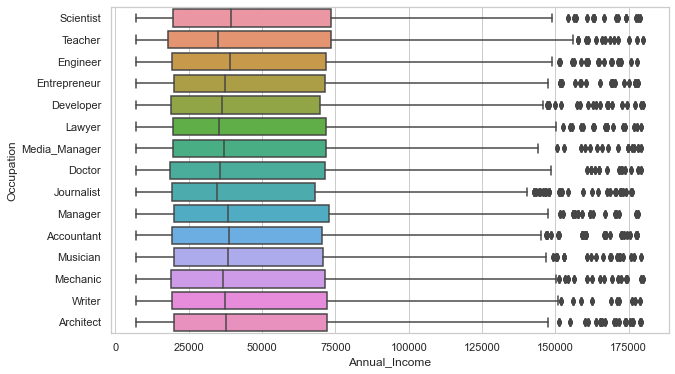

In [1264]:
sns.boxplot(x=df_train.Annual_Income, y=df_train.Occupation);